In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels.shape

(60000,)

In [5]:

test_images.shape

(10000, 28, 28)

In [6]:

test_labels.shape

(10000,)

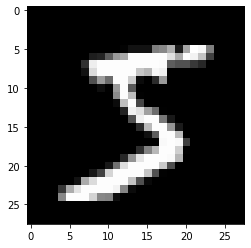

In [7]:
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(train_images[0])

In [8]:

train_labels[0]

5

In [9]:
from keras import models
from keras import layers
model_mlp = models.Sequential()
model_mlp.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model_mlp.add(layers.Dense(10, activation='softmax'))
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_mlp.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_images.shape
train_images_mlp = train_images.reshape(60000, 28*28)
train_images_mlp.shape
train_images_mlp[0][350]


70

In [12]:
train_images_mlp = train_images_mlp.astype('float32') / 255
# type has changed to float 
type(train_images_mlp[0][350])

numpy.float32

In [13]:
train_images_mlp[0][350]

0.27450982

In [14]:
test_images_mlp = test_images.reshape(10000,28*28)
test_images_mlp = test_images_mlp.astype('float32') / 255

In [15]:
train_labels[0]
from keras.utils import to_categorical
train_labels_mlp = to_categorical(train_labels)
train_labels_mlp[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
test_labels_mlp = to_categorical(test_labels)

In [17]:
model_mlp.fit(train_images_mlp, train_labels_mlp, epochs = 5, batch_size = 120)


Epoch 1/5
500/500 [==============================] - 4s 6ms/step - loss: 0.2499 - accuracy: 0.9269
Epoch 2/5
500/500 [==============================] - 3s 6ms/step - loss: 0.1004 - accuracy: 0.9701
Epoch 3/5
500/500 [==============================] - 3s 6ms/step - loss: 0.0671 - accuracy: 0.9804
Epoch 4/5
500/500 [==============================] - 3s 6ms/step - loss: 0.0485 - accuracy: 0.9855
Epoch 5/5
500/500 [==============================] - 3s 6ms/step - loss: 0.0371 - accuracy: 0.9890


In [18]:
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images_mlp, test_labels_mlp)

313/313 [==============================] - 1s 2ms/step - loss: 0.0702 - accuracy: 0.9798


In [19]:
print('test accuracy:', (test_acc_mlp*100))

test accuracy: 97.97999858856201


In [20]:
from keras import models
from keras import layers
model_cnn = models.Sequential()

In [21]:
model_cnn.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

In [22]:
model_cnn.add(layers.MaxPooling2D(2,2))

In [23]:
model_cnn.add(layers.Conv2D(64, (3,3), activation = 'relu'))

In [24]:
model_cnn.add(layers.MaxPooling2D(2,2))

In [25]:
model_cnn.add(layers.Conv2D(64, (3,3), activation='relu'))

In [26]:
model_cnn.add(layers.Flatten())

In [27]:
model_cnn.add(layers.Dense(64, activation = 'relu'))

In [28]:

model_cnn.add(layers.Dense(10, activation = 'softmax'))

In [29]:
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
train_images_cnn = train_images.reshape(60000, 28, 28, 1)
train_images_cnn.shape

(60000, 28, 28, 1)

In [32]:
train_images_cnn = train_images_cnn.astype('float32') / 255
test_images_cnn = test_images.reshape(10000, 28, 28, 1)
test_images_cnn = test_images_cnn.astype('float32') / 255

In [33]:
from keras.utils import to_categorical
train_labels_cnn = to_categorical(train_labels)
test_labels_cnn = to_categorical(test_labels)

In [34]:
model_cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs = 5, batch_size = 60)

Epoch 1/5
1000/1000 [==============================] - 35s 34ms/step - loss: 0.1629 - accuracy: 0.9485
Epoch 2/5
1000/1000 [==============================] - 35s 35ms/step - loss: 0.0463 - accuracy: 0.9854
Epoch 3/5
1000/1000 [==============================] - 35s 35ms/step - loss: 0.0321 - accuracy: 0.9901
Epoch 4/5
1000/1000 [==============================] - 36s 36ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 5/5
1000/1000 [==============================] - 35s 35ms/step - loss: 0.0205 - accuracy: 0.9939


In [36]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)

313/313 [==============================] - 2s 6ms/step - loss: 0.0280 - accuracy: 0.9915


In [37]:
print('test accuracy:', (test_acc_cnn*100))

test accuracy: 99.15000200271606
